In [42]:
import sqlite3
import pandas as pd
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pathlib import Path

In [43]:
dbPath = Path("../data/data.sqlite")
if not dbPath.exists():
    # Avoid creating an empty database
    raise Exception("Database file does not exist")
con = sqlite3.connect(dbPath)

In [44]:
def query2BPMN(sql):
    df = pd.read_sql_query(sql, con)
    df["EVENTTIME"] = pd.to_datetime(df["EVENTTIME"])
    log = pm4py.format_dataframe(df, case_id="_CASE_KEY", activity_key="ACTIVITY_EN", timestamp_key="EVENTTIME")
    net, initial_marking, final_marking = alpha_miner.apply(log)
    process_model = pm4py.discover_bpmn_inductive(log)
    pm4py.view_bpmn(process_model)

/var/folders/1g/13_jxrtx2wq280_54dl058f40000gn/T/ipykernel_46704/1239514071.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["EVENTTIME"] = pd.to_datetime(df["EVENTTIME"])
/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/RootCauseAnalysis/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
/Users/passion/IIS/IIS Semester 5/FWP_ProcessInt/RootCauseAnalysis/.venv/lib/python3.11/site-packages/pm4py/objects/log/util/dataframe_utils.py:180: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expec

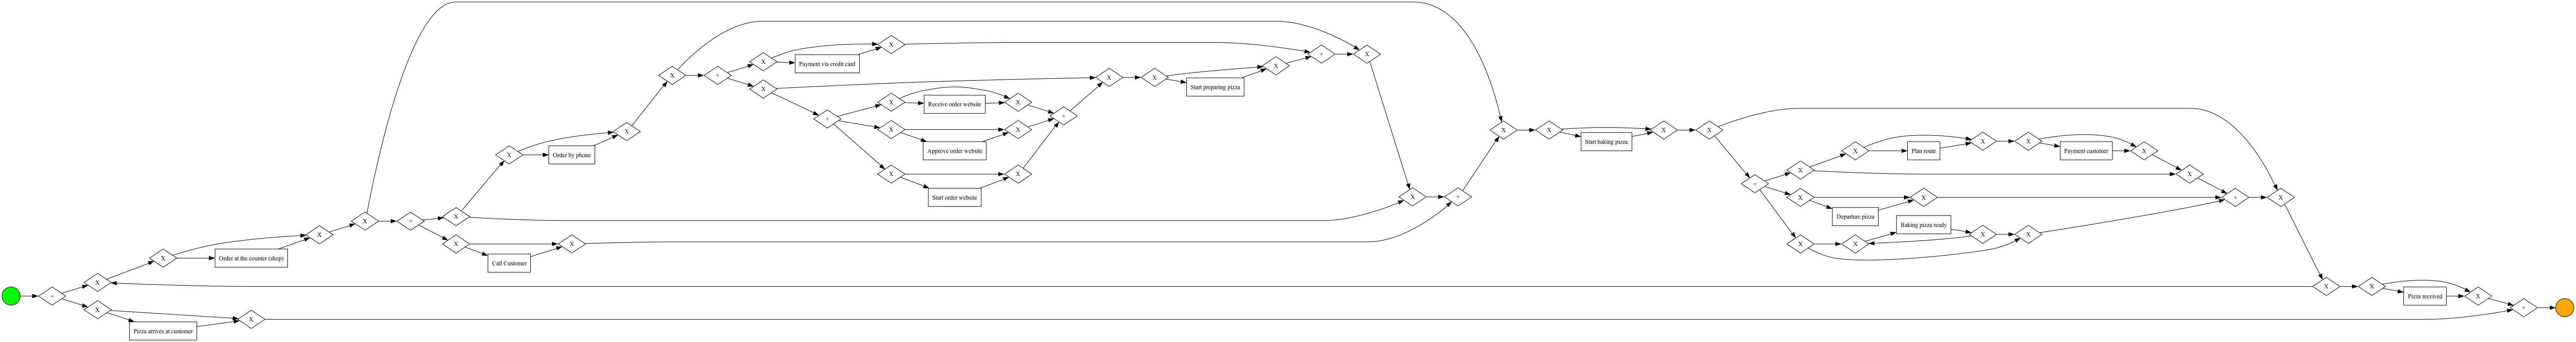

In [45]:
query2BPMN("SELECT * FROM Pizza_Event")

In [46]:
queries = [
        "SELECT * FROM Pizza_Event",

        """select e.sorting, e.EVENTTIME, e.ACTIVITY_EN, e.Automation,  c.*, Revenue - Costs as "Profit"
from Pizza_Event e
inner join Pizza_Case c on e._CASE_KEY = c._CASE_KEY
WHERE Variant = 1
order by sorting
        """
]

for query in queries:
        query2BPMN(query)
        print(query)
        print()
        print()